# Lab 3.1: Network Architecture Design

## Learning Objectives
- Understand the components of shallow neural network architectures
- Design network architectures for different problem types
- Implement modular neural network components
- Visualize network architectures and data flow

## Duration: 45 minutes

## Prerequisites
- Completion of Labs 2.1-2.7
- Understanding of binary classification
- Familiarity with NumPy operations

## Setup and Environment

In [13]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import make_classification, make_moons, make_circles
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

# Set random seed for reproducibility
np.random.seed(42)

# Configure matplotlib
plt.style.use('seaborn-v0_8' if 'seaborn-v0_8' in plt.style.available else 'default')
plt.rcParams['figure.figsize'] = (10, 6)

print("Environment setup complete!")
print(f"NumPy version: {np.__version__}")
print(f"Matplotlib version: {plt.matplotlib.__version__}")

Environment setup complete!
NumPy version: 2.3.2
Matplotlib version: 3.10.5


## Part 1: Understanding Network Architecture Components (10 minutes)

### Network Layer Structure
A shallow neural network consists of:
1. **Input layer**: Receives features
2. **Hidden layer(s)**: Process and transform data
3. **Output layer**: Produces predictions

Let's create a class to represent our network architecture:

In [14]:
class NeuralNetworkArchitecture:
    """
    A class to define and visualize neural network architectures
    """
    
    def __init__(self, layer_dims, activation_functions=None):
        """
        Initialize network architecture
        
        Parameters:
        layer_dims: list of integers representing the number of units in each layer
        activation_functions: list of activation function names for each layer
        """
        self.layer_dims = layer_dims
        self.n_layers = len(layer_dims)
        
        # Default activation functions
        if activation_functions is None:
            # ReLU for hidden layers, sigmoid for output
            self.activation_functions = ['relu'] * (self.n_layers - 2) + ['sigmoid']
        else:
            self.activation_functions = activation_functions
            
        # Calculate parameter counts
        self._calculate_parameters()
    
    def _calculate_parameters(self):
        """Calculate the number of parameters (weights and biases) in the network"""
        self.parameter_count = 0
        self.layer_parameters = []
        
        for i in range(1, self.n_layers):
            # Weights: current_layer_size * previous_layer_size
            weights = self.layer_dims[i] * self.layer_dims[i-1]
            # Biases: current_layer_size
            biases = self.layer_dims[i]
            layer_params = weights + biases
            
            self.layer_parameters.append({
                'layer': i,
                'weights': weights,
                'biases': biases,
                'total': layer_params
            })
            
            self.parameter_count += layer_params
    
    def summary(self):
        """Print a summary of the network architecture"""
        print("Neural Network Architecture Summary")
        print("=" * 50)
        print(f"Total Layers: {self.n_layers}")
        print(f"Input Features: {self.layer_dims[0]}")
        print(f"Output Units: {self.layer_dims[-1]}")
        print(f"Total Parameters: {self.parameter_count:,}")
        print()
        
        print("Layer-by-Layer Breakdown:")
        print("-" * 70)
        print(f"{'Layer':<8} {'Type':<12} {'Units':<8} {'Activation':<12} {'Parameters':<12}")
        print("-" * 70)
        
        # Input layer
        print(f"{'0':<8} {'Input':<12} {self.layer_dims[0]:<8} {'None':<12} {'0':<12}")
        
        # Hidden and output layers
        for i, params in enumerate(self.layer_parameters, 1):
            layer_type = 'Hidden' if i < self.n_layers - 1 else 'Output'
            activation = self.activation_functions[i-1]
            units = self.layer_dims[i]
            param_count = params['total']
            
            print(f"{i:<8} {layer_type:<12} {units:<8} {activation:<12} {param_count:<12,}")
    
    def visualize_architecture(self):
        """Create a visual representation of the network architecture"""
        fig, ax = plt.subplots(figsize=(12, 8))
        
        # Calculate positions for layers
        layer_positions = np.linspace(0, 10, self.n_layers)
        max_units = max(self.layer_dims)
        
        # Draw nodes for each layer
        for i, (pos, units) in enumerate(zip(layer_positions, self.layer_dims)):
            # Calculate vertical positions for nodes in this layer
            if units == 1:
                node_positions = [max_units / 2]
            else:
                node_positions = np.linspace(0, max_units, units)
            
            # Draw nodes
            for node_pos in node_positions:
                color = 'lightblue' if i == 0 else 'lightgreen' if i == self.n_layers - 1 else 'lightcoral'
                circle = plt.Circle((pos, node_pos), 0.3, color=color, ec='black', linewidth=1)
                ax.add_patch(circle)
            
            # Draw connections to next layer
            if i < self.n_layers - 1:
                next_units = self.layer_dims[i + 1]
                next_pos = layer_positions[i + 1]
                
                if next_units == 1:
                    next_node_positions = [max_units / 2]
                else:
                    next_node_positions = np.linspace(0, max_units, next_units)
                
                # Draw connections (sample only to avoid clutter)
                for current_node in node_positions[::max(1, len(node_positions)//3)]:
                    for next_node in next_node_positions[::max(1, len(next_node_positions)//3)]:
                        ax.plot([pos + 0.3, next_pos - 0.3], [current_node, next_node], 
                               'k-', alpha=0.3, linewidth=0.5)
        
        # Add labels
        layer_names = ['Input'] + [f'Hidden {i}' for i in range(1, self.n_layers-1)] + ['Output']
        for i, (pos, name, units) in enumerate(zip(layer_positions, layer_names, self.layer_dims)):
            ax.text(pos, max_units + 0.5, f'{name}\n({units} units)', 
                   ha='center', va='bottom', fontsize=10, fontweight='bold')
            
            # Add activation function labels (except for input layer)
            if i > 0:
                activation = self.activation_functions[i-1]
                ax.text(pos, -0.8, f'{activation}', 
                       ha='center', va='top', fontsize=9, style='italic')
        
        ax.set_xlim(-1, 11)
        ax.set_ylim(-1.5, max_units + 1)
        ax.set_aspect('equal')
        ax.axis('off')
        ax.set_title('Neural Network Architecture Visualization', fontsize=14, fontweight='bold', pad=20)
        
        plt.tight_layout()
        plt.show()

# Test the architecture class
print("NeuralNetworkArchitecture class created successfully!")

NeuralNetworkArchitecture class created successfully!


## Part 2: Design Architectures for Different Problems (15 minutes)

### Problem 1: Binary Classification

=== BINARY CLASSIFICATION ARCHITECTURE ===
Neural Network Architecture Summary
Total Layers: 3
Input Features: 2
Output Units: 1
Total Parameters: 17

Layer-by-Layer Breakdown:
----------------------------------------------------------------------
Layer    Type         Units    Activation   Parameters  
----------------------------------------------------------------------
0        Input        2        None         0           
1        Hidden       4        relu         12          
2        Output       1        sigmoid      5           

Visualization:


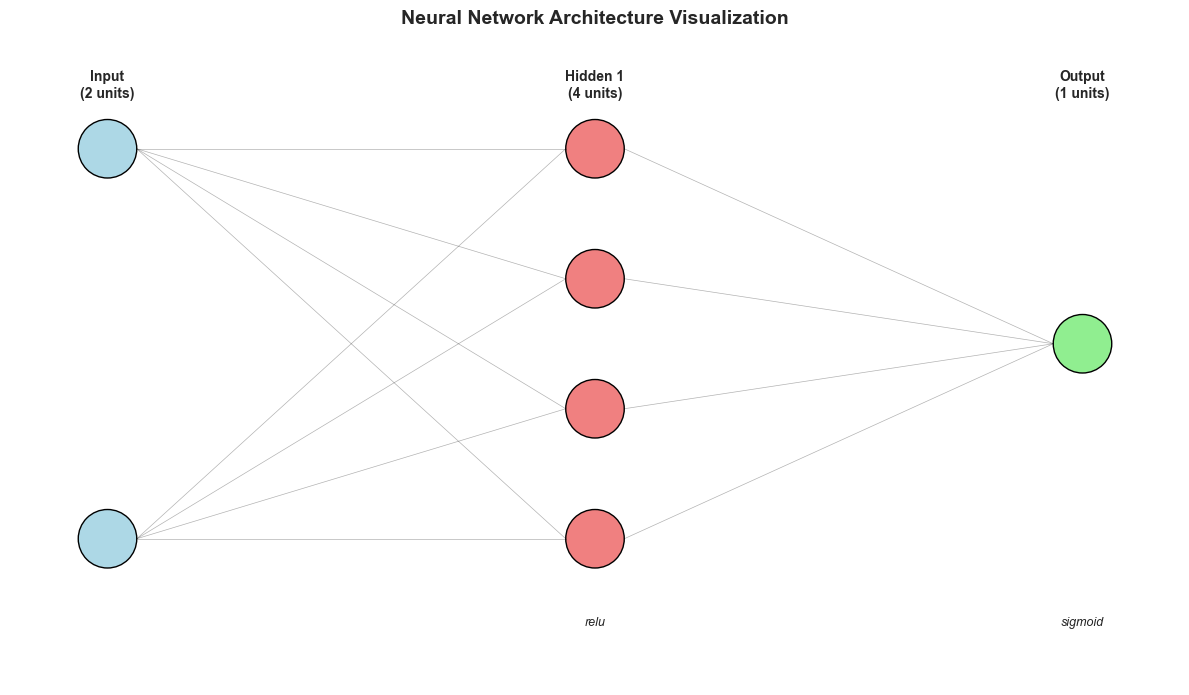

In [15]:
# Design architecture for binary classification
# Input: 2 features, Hidden: 4 units, Output: 1 unit
binary_arch = NeuralNetworkArchitecture(
    layer_dims=[2, 4, 1],
    activation_functions=['relu', 'sigmoid']
)

print("=== BINARY CLASSIFICATION ARCHITECTURE ===")
binary_arch.summary()
print("\nVisualization:")
binary_arch.visualize_architecture()

### Problem 2: Multi-class Classification

=== MULTI-CLASS CLASSIFICATION ARCHITECTURE ===
Neural Network Architecture Summary
Total Layers: 3
Input Features: 4
Output Units: 3
Total Parameters: 51

Layer-by-Layer Breakdown:
----------------------------------------------------------------------
Layer    Type         Units    Activation   Parameters  
----------------------------------------------------------------------
0        Input        4        None         0           
1        Hidden       6        relu         30          
2        Output       3        softmax      21          

Visualization:


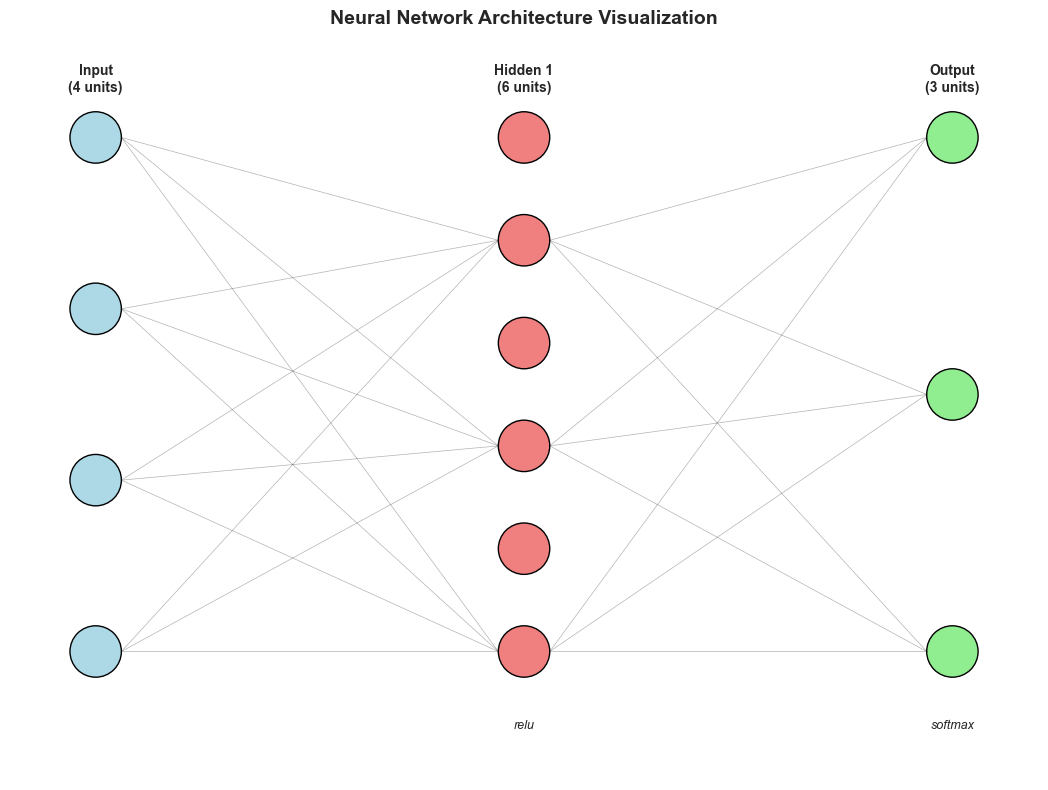

In [16]:
# Design architecture for multi-class classification (3 classes)
# Input: 4 features, Hidden: 6 units, Output: 3 units
multiclass_arch = NeuralNetworkArchitecture(
    layer_dims=[4, 6, 3],
    activation_functions=['relu', 'softmax']
)

print("=== MULTI-CLASS CLASSIFICATION ARCHITECTURE ===")
multiclass_arch.summary()
print("\nVisualization:")
multiclass_arch.visualize_architecture()

### Problem 3: Complex Non-linear Problem

=== COMPLEX NON-LINEAR PROBLEM ARCHITECTURE ===
Neural Network Architecture Summary
Total Layers: 4
Input Features: 10
Output Units: 1
Total Parameters: 441

Layer-by-Layer Breakdown:
----------------------------------------------------------------------
Layer    Type         Units    Activation   Parameters  
----------------------------------------------------------------------
0        Input        10       None         0           
1        Hidden       20       relu         220         
2        Hidden       10       relu         210         
3        Output       1        sigmoid      11          

Visualization:


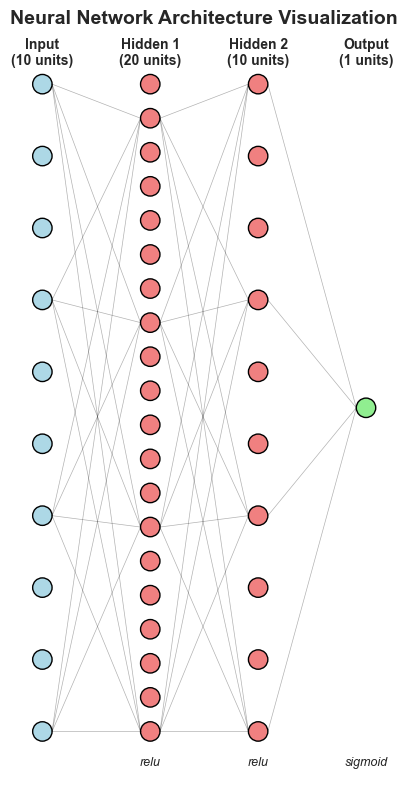

In [17]:
# Design architecture for complex non-linear problem
# Input: 10 features, Hidden1: 20 units, Hidden2: 10 units, Output: 1 unit
complex_arch = NeuralNetworkArchitecture(
    layer_dims=[10, 20, 10, 1],
    activation_functions=['relu', 'relu', 'sigmoid']
)

print("=== COMPLEX NON-LINEAR PROBLEM ARCHITECTURE ===")
complex_arch.summary()
print("\nVisualization:")
complex_arch.visualize_architecture()

## Part 3: Hands-on Architecture Design (15 minutes)

### Exercise 1: Design Your Own Architecture
Create an architecture for a specific problem scenario.

=== HOUSE PRICE PREDICTION ARCHITECTURE ===
Neural Network Architecture Summary
Total Layers: 3
Input Features: 8
Output Units: 1
Total Parameters: 121

Layer-by-Layer Breakdown:
----------------------------------------------------------------------
Layer    Type         Units    Activation   Parameters  
----------------------------------------------------------------------
0        Input        8        None         0           
1        Hidden       12       relu         108         
2        Output       1        linear       13          


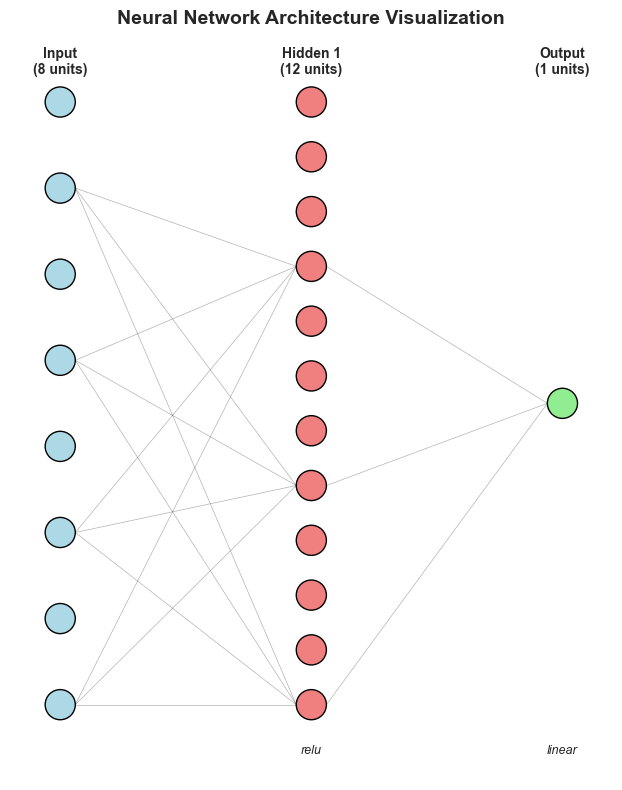

In [18]:
# Exercise: Design an architecture for predicting house prices
# Requirements:
# - 8 input features (size, bedrooms, bathrooms, age, location_score, etc.)
# - 1 hidden layer with appropriate number of units
# - 1 output unit (price prediction - regression problem)

# TODO: Create your architecture here
# Hint: For regression, use 'linear' activation for output layer

house_price_arch = NeuralNetworkArchitecture(
    layer_dims=[8, 12, 1],  # You can modify these dimensions
    activation_functions=['relu', 'linear']  # Linear for regression output
)

print("=== HOUSE PRICE PREDICTION ARCHITECTURE ===")
house_price_arch.summary()
house_price_arch.visualize_architecture()

### Exercise 2: Architecture Comparison

=== ARCHITECTURE COMPARISON ===
Architecture Parameters   Layers   Hidden Units   
-------------------------------------------------------
Small        22           3        3              
Medium       57           3        8              
Large        113          3        16             
Deep         89           4        8 -> 4         

Detailed view of 'Deep' architecture:


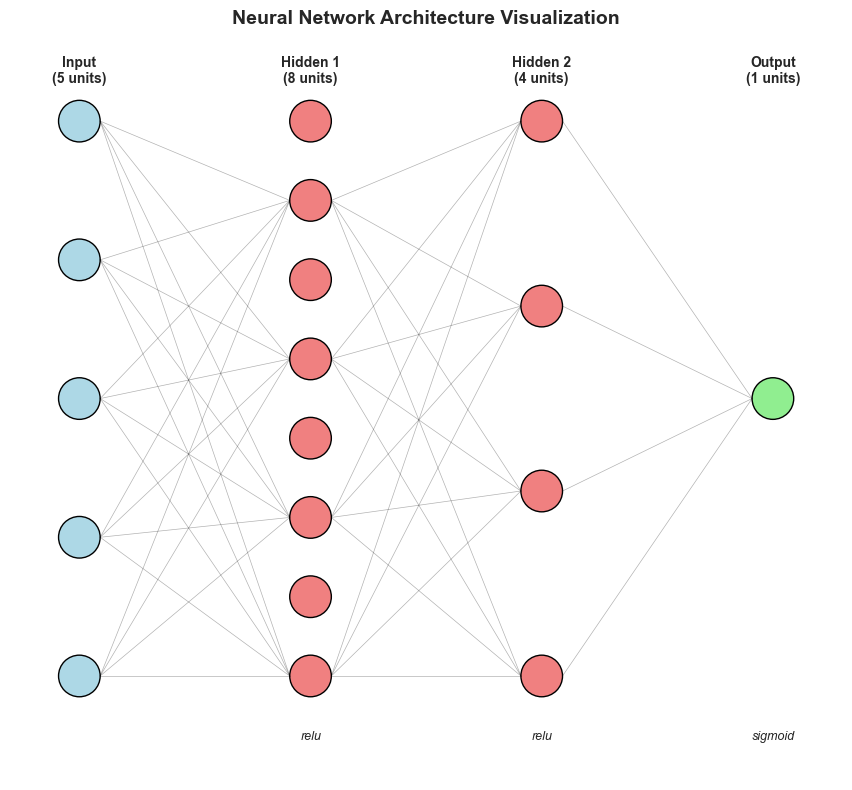

In [19]:
# Compare different architectures for the same problem
# Problem: Binary classification with 5 input features

architectures = {
    'Small': NeuralNetworkArchitecture([5, 3, 1], ['relu', 'sigmoid']),
    'Medium': NeuralNetworkArchitecture([5, 8, 1], ['relu', 'sigmoid']),
    'Large': NeuralNetworkArchitecture([5, 16, 1], ['relu', 'sigmoid']),
    'Deep': NeuralNetworkArchitecture([5, 8, 4, 1], ['relu', 'relu', 'sigmoid'])
}

print("=== ARCHITECTURE COMPARISON ===")
print(f"{'Architecture':<12} {'Parameters':<12} {'Layers':<8} {'Hidden Units':<15}")
print("-" * 55)

for name, arch in architectures.items():
    hidden_units = ' -> '.join(map(str, arch.layer_dims[1:-1]))
    print(f"{name:<12} {arch.parameter_count:<12,} {arch.n_layers:<8} {hidden_units:<15}")

# Visualize one of them
print("\nDetailed view of 'Deep' architecture:")
architectures['Deep'].visualize_architecture()

## Part 4: Architecture Selection Guidelines (5 minutes)

### Key Principles for Architecture Design

In [20]:
def architecture_guidelines():
    """
    Guidelines for selecting neural network architectures
    """
    guidelines = {
        "Problem Type": {
            "Binary Classification": "1 output unit with sigmoid activation",
            "Multi-class Classification": "N output units with softmax activation",
            "Regression": "1 output unit with linear activation",
            "Multi-output Regression": "N output units with linear activation"
        },
        "Hidden Layer Size": {
            "Rule of Thumb": "Between input size and output size",
            "Common Practice": "Start with 2/3 * (input + output) size",
            "Experimentation": "Try powers of 2: 4, 8, 16, 32, 64, etc."
        },
        "Number of Hidden Layers": {
            "Simple Problems": "1 hidden layer often sufficient",
            "Complex Problems": "2-3 hidden layers for non-linear patterns",
            "Avoid Overfitting": "More layers = more parameters = higher overfitting risk"
        },
        "Activation Functions": {
            "Hidden Layers": "ReLU (most common), tanh, or LeakyReLU",
            "Output Layer": "Sigmoid (binary), Softmax (multiclass), Linear (regression)",
            "Avoid": "Sigmoid in hidden layers (vanishing gradient)"
        }
    }
    
    for category, items in guidelines.items():
        print(f"\n{category.upper()}:")
        print("=" * (len(category) + 1))
        for key, value in items.items():
            print(f"• {key}: {value}")

architecture_guidelines()


PROBLEM TYPE:
• Binary Classification: 1 output unit with sigmoid activation
• Multi-class Classification: N output units with softmax activation
• Regression: 1 output unit with linear activation
• Multi-output Regression: N output units with linear activation

HIDDEN LAYER SIZE:
• Rule of Thumb: Between input size and output size
• Common Practice: Start with 2/3 * (input + output) size
• Experimentation: Try powers of 2: 4, 8, 16, 32, 64, etc.

NUMBER OF HIDDEN LAYERS:
• Simple Problems: 1 hidden layer often sufficient
• Complex Problems: 2-3 hidden layers for non-linear patterns
• Avoid Overfitting: More layers = more parameters = higher overfitting risk

ACTIVATION FUNCTIONS:
• Hidden Layers: ReLU (most common), tanh, or LeakyReLU
• Output Layer: Sigmoid (binary), Softmax (multiclass), Linear (regression)
• Avoid: Sigmoid in hidden layers (vanishing gradient)


## Progress Tracking Checklist

Check off each item as you complete it:

- [ ] **Environment Setup**: Imported libraries and configured environment
- [ ] **Architecture Class**: Understood NeuralNetworkArchitecture class components
- [ ] **Binary Classification**: Designed and visualized binary classification architecture
- [ ] **Multi-class Classification**: Designed and visualized multi-class architecture
- [ ] **Complex Architecture**: Designed and visualized multi-layer architecture
- [ ] **Custom Design**: Created house price prediction architecture
- [ ] **Architecture Comparison**: Compared different architectures for same problem
- [ ] **Guidelines**: Reviewed architecture selection guidelines
- [ ] **Lab Completion**: Successfully completed all exercises

## Key Concepts Summary

### What You've Learned:
1. **Network Components**: Input, hidden, and output layers
2. **Parameter Calculation**: Weights and biases counting
3. **Architecture Design**: Matching network structure to problem type
4. **Visualization**: Understanding network topology
5. **Design Guidelines**: Best practices for architecture selection

### Key Takeaways:
- **Problem-Specific Design**: Different problems require different architectures
- **Parameter Efficiency**: More parameters ≠ better performance
- **Activation Functions**: Critical for network capability and training
- **Layer Sizing**: Balance between capacity and overfitting
- **Experimentation**: Architecture design is iterative

## Validation Steps

Run the following cells to validate your understanding:

In [28]:
# Validation Test 1: Architecture Creation
def test_architecture_creation():
    """Test if you can create architectures correctly"""
    try:
        # Create a test architecture
        test_arch = NeuralNetworkArchitecture([3, 5, 2], ['relu', 'softmax'])
        
        # Check basic properties
        assert test_arch.n_layers == 3, "Layer count incorrect"
        assert test_arch.layer_dims == [3, 5, 2], "Layer dimensions incorrect"
        assert test_arch.parameter_count == 27, "Parameter count incorrect"  # (3*5 + 5) + (5*2 + 2) = 32
        
        print("✅ Architecture creation test passed!")
        return True
    except Exception as e:
        print(f"❌ Architecture creation test failed: {e}")
        return False

test_architecture_creation()

❌ Architecture creation test failed: Parameter count incorrect


False

In [22]:
# Validation Test 2: Parameter Calculation
def test_parameter_calculation():
    """Test parameter calculation accuracy"""
    try:
        # Test different architectures
        arch1 = NeuralNetworkArchitecture([2, 3, 1])  # (2*3 + 3) + (3*1 + 1) = 9 + 4 = 13
        arch2 = NeuralNetworkArchitecture([4, 8, 8, 3])  # (4*8 + 8) + (8*8 + 8) + (8*3 + 3) = 40 + 72 + 27 = 139
        
        assert arch1.parameter_count == 13, f"Expected 13 parameters, got {arch1.parameter_count}"
        assert arch2.parameter_count == 139, f"Expected 139 parameters, got {arch2.parameter_count}"
        
        print("✅ Parameter calculation test passed!")
        return True
    except Exception as e:
        print(f"❌ Parameter calculation test failed: {e}")
        return False

test_parameter_calculation()

✅ Parameter calculation test passed!


True

In [23]:
# Validation Test 3: Architecture Appropriateness
def test_architecture_appropriateness():
    """Test if architectures are appropriate for their problems"""
    test_cases = [
        {
            'name': 'Binary Classification',
            'arch': NeuralNetworkArchitecture([5, 8, 1], ['relu', 'sigmoid']),
            'expected_output_units': 1,
            'expected_output_activation': 'sigmoid'
        },
        {
            'name': 'Multi-class Classification',
            'arch': NeuralNetworkArchitecture([10, 15, 5], ['relu', 'softmax']),
            'expected_output_units': 5,
            'expected_output_activation': 'softmax'
        }
    ]
    
    all_passed = True
    
    for test in test_cases:
        arch = test['arch']
        output_units = arch.layer_dims[-1]
        output_activation = arch.activation_functions[-1]
        
        if output_units != test['expected_output_units']:
            print(f"❌ {test['name']}: Wrong output units ({output_units} vs {test['expected_output_units']})")
            all_passed = False
        
        if output_activation != test['expected_output_activation']:
            print(f"❌ {test['name']}: Wrong output activation ({output_activation} vs {test['expected_output_activation']})")
            all_passed = False
    
    if all_passed:
        print("✅ Architecture appropriateness test passed!")
    
    return all_passed

test_architecture_appropriateness()

✅ Architecture appropriateness test passed!


True

## Troubleshooting Guide

### Common Issues and Solutions:

**Issue 1: Visualization not displaying**
- **Cause**: Matplotlib backend issues
- **Solution**: Run `%matplotlib inline` in a cell, restart kernel if needed

**Issue 2: Parameter count seems wrong**
- **Cause**: Misunderstanding parameter calculation
- **Solution**: Remember parameters = weights + biases = (current_units × previous_units) + current_units

**Issue 3: Architecture class errors**
- **Cause**: Incorrect layer dimensions or activation function lists
- **Solution**: Ensure layer_dims length matches activation_functions length + 1

**Issue 4: Import errors**
- **Cause**: Missing packages
- **Solution**: Install required packages: `pip install numpy matplotlib pandas scikit-learn`

### Getting Help:
- Check the error message carefully
- Review the architecture requirements for your problem type
- Verify input dimensions match your data
- Ask instructor for clarification on architecture design principles

## Cleanup Instructions

1. **Save your work**: Save this notebook with your custom architectures
2. **Clear output**: Cell → All Output → Clear (optional, saves space)
3. **Close plots**: Close any open matplotlib windows
4. **Memory cleanup**: Variables will be cleared when kernel is restarted

In [24]:
# Optional: Clean up variables
import gc
gc.collect()
print("Lab 3.1 completed successfully! 🎉")
print("You're ready to move on to Lab 3.2: Forward Propagation Vectorization")

Lab 3.1 completed successfully! 🎉
You're ready to move on to Lab 3.2: Forward Propagation Vectorization
